[3.0, 10.0, 11.0, 12.0, 18.0, 19.0, 20.0, 20.0, 22.0, 25.0, 31.0, 31.0, 32.0, 36.0, 37.0, 39.0, 40.0, 42.0, 43.0, 46.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 51.0, 51.0, 51.0, 55.0, 55.0, 56.0, 57.0, 58.0, 59.0, 59.0, 60.0, 62.0, 64.0, 66.0, 67.0, 68.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0, 70.0, 70.0, 71.0, 72.0, 72.0, 72.0, 72.0, 72.0, 75.0, 75.0, 76.0, 76.0, 76.0, 77.0, 77.0, 77.0, 78.0, 78.0, 78.0, 78.0, 78.0, 79.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 85.0, 85.0, 86.0, 86.0, 87.0, 87.0, 88.0, 88.0, 88.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 91.0, 91.0, 91.0, 91.0

/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


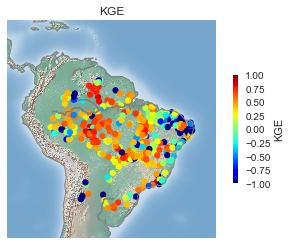

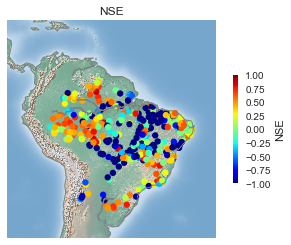

/Users/killaars/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


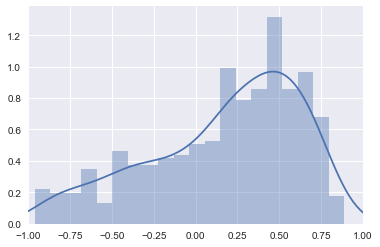

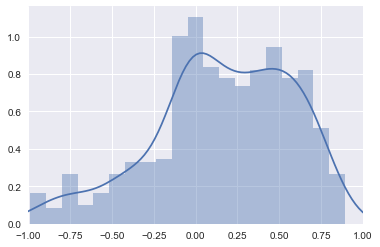

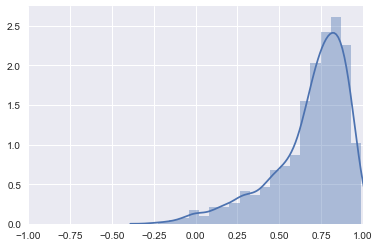

In [2]:
import numpy as np
import os,sys
import pandas as pd
import netCDF4 as nc
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import fileinput
%matplotlib inline

data = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/summary_MSWEP_all.txt',sep=";",index_col='id_from_grdc')

print(sorted(data['num_of_month_pairs'].values))
data=data[data['num_of_month_pairs']>12]
print(sorted(data['num_of_month_pairs'].values))
#print(data)
#sys.exit()
# plot KGE
# Plot locations on map
# Worldwide
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#             llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
                llcrnrlat=-35,urcrnrlat=20,\
                llcrnrlon=-90,urcrnrlon=-30,\
                rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot NSE
# Plot locations on map
# Worldwide
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#             llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
                llcrnrlat=-35,urcrnrlat=20,\
                llcrnrlon=-90,urcrnrlon=-30,\
                rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['ns_efficiency'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("NSE")
plt.title('NSE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

## STATISTICS ARE FOR WHOLE WORLD!!! SELECT DIFFERENT SUMMARY FILE FOR AMAZON STATISTICS
#sys.exit()
hist = data["kge_2012"].values[np.logical_not(np.isnan(data["kge_2012"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["ns_efficiency"].values[np.logical_not(np.isnan(data["ns_efficiency"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["correlation"].values[np.logical_not(np.isnan(data["correlation"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

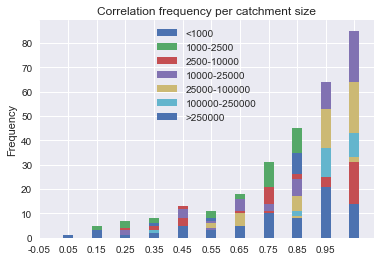

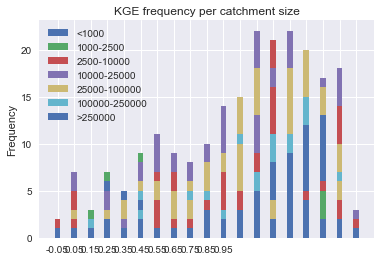

In [14]:
correlationplot = data['correlation'].groupby([pd.cut(data['correlation'],np.arange(-1,1,.10)),
                                    pd.cut(data['grdc_catchment_area_in_km2'],
                                           [0,1000,2500,10000,25000,100000,250000,10000000])]).agg({'count'}).unstack()

correlationplot.columns = ['<1000', '1000-2500','2500-10000','10000-25000','25000-100000','100000-250000','>250000']

catchment0=correlationplot['<1000'].values
catchment1=correlationplot['1000-2500'].values
catchment2=correlationplot['2500-10000'].values
catchment3=correlationplot['10000-25000'].values
catchment4=correlationplot['25000-100000'].values
catchment5=correlationplot['100000-250000'].values
catchment6=correlationplot['>250000'].values

N = len(correlationplot)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, catchment0, width)
p2 = plt.bar(ind, catchment1, width,bottom=catchment0)
p3 = plt.bar(ind, catchment2, width,bottom=catchment1)
p4 = plt.bar(ind, catchment3, width,bottom=catchment2)
p5 = plt.bar(ind, catchment4, width,bottom=catchment3)
p6 = plt.bar(ind, catchment5, width,bottom=catchment4)
p7 = plt.bar(ind, catchment6, width,bottom=catchment5)

plt.ylabel('Frequency')
plt.title('Correlation frequency per catchment size')
plt.xticks(ind, (np.arange(-0.05,1.05,0.1)))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('<1000', '1000-2500','2500-10000',
                                                               '10000-25000','25000-100000','100000-250000',
                                                               '>250000'))

plt.show()

KGEplot = data['kge_2012'].groupby([pd.cut(data['kge_2012'],np.arange(-1,1,.10)),
                                    pd.cut(data['grdc_catchment_area_in_km2'],
                                           [0,1000,2500,10000,25000,100000,250000,10000000])]).agg({'count'}).unstack()

KGEplot.columns = ['<1000', '1000-2500','2500-10000','10000-25000','25000-100000','100000-250000','>250000']

KGE_catchment0=KGEplot['<1000'].values
KGE_catchment1=KGEplot['1000-2500'].values
KGE_catchment2=KGEplot['2500-10000'].values
KGE_catchment3=KGEplot['10000-25000'].values
KGE_catchment4=KGEplot['25000-100000'].values
KGE_catchment5=KGEplot['100000-250000'].values
KGE_catchment6=KGEplot['>250000'].values

N = len(KGEplot)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, KGE_catchment0, width)
p2 = plt.bar(ind, KGE_catchment1, width,bottom=KGE_catchment0)
p3 = plt.bar(ind, KGE_catchment2, width,bottom=KGE_catchment1)
p4 = plt.bar(ind, KGE_catchment3, width,bottom=KGE_catchment2)
p5 = plt.bar(ind, KGE_catchment4, width,bottom=KGE_catchment3)
p6 = plt.bar(ind, KGE_catchment5, width,bottom=KGE_catchment4)
p7 = plt.bar(ind, KGE_catchment6, width,bottom=KGE_catchment5)

plt.ylabel('Frequency')
plt.title('KGE frequency per catchment size')
plt.xticks(ind, (np.arange(-0.05,1.05,0.1)))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('<1000', '1000-2500','2500-10000',
                                                               '10000-25000','25000-100000','100000-250000',
                                                               '>250000'))

plt.show()

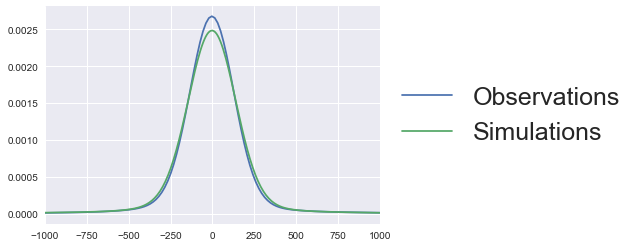

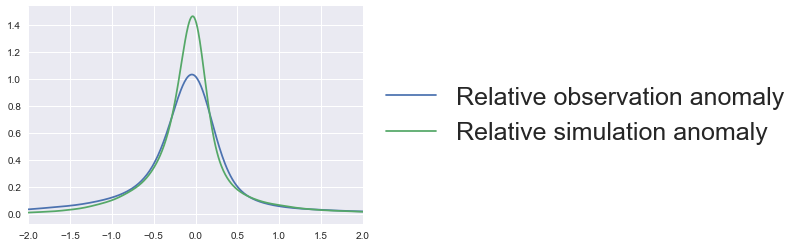

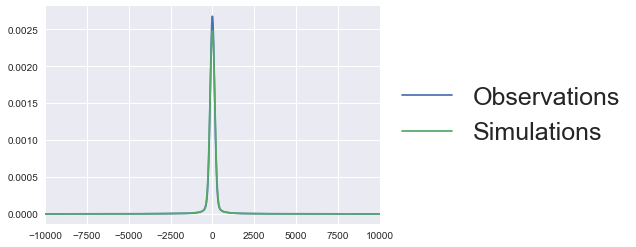

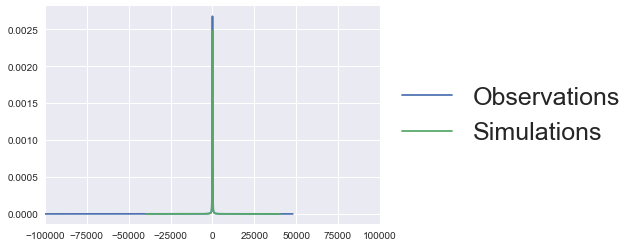

In [3]:
# Monthly Anomaly correlation
obs_ano=[]
sim_ano=[]
obs_rel_ano=[]
sim_rel_ano=[]
path='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA_and_other/'
for file in os.listdir(path):
    if file.endswith('.txt'):
        #print(file)
        data_ano = pd.read_csv(os.path.join(path,file),sep=";",skiprows=3)
        f=open(os.path.join(path,file))
        text=f.readlines(0)
        for t in text:
            if t.endswith('.mon\n'):
                station=t.split("/")[-1]
                grdc_id=station[0:7]
        data_ano=data_ano.dropna()
        data_ano['date'] = pd.to_datetime(data_ano['date'])
        data_ano=data_ano.set_index('date')
        month_mean=data_ano.groupby([data_ano.index.month]).mean()
        #print(month_mean)
        for index in data_ano.index.values:
            #print(index)
            month=pd.to_datetime(index).month
            data_ano.loc[index,'observation_anomaly']=data_ano.loc[index,'observation']-month_mean.loc[int(month),'observation']
            data_ano.loc[index,'simulated_anomaly']=data_ano.loc[index,'simulation']-month_mean.loc[int(month),'simulation']
            data_ano['obs_relative_anomaly']=data_ano['observation_anomaly']/data_ano['observation'].mean()
            data_ano['sim_relative_anomaly']=data_ano['simulated_anomaly']/data_ano['simulation'].mean()
        #print(data_ano)
        obs_ano=np.append(obs_ano,data_ano['observation_anomaly'].values)        
        sim_ano=np.append(sim_ano,data_ano['simulated_anomaly'].values)
        obs_rel_ano=np.append(obs_rel_ano,data_ano['obs_relative_anomaly'].values)        
        sim_rel_ano=np.append(sim_rel_ano,data_ano['sim_relative_anomaly'].values)
        #print(obs_ano)
        #print(sim_ano)
        anomaly_correlation=data_ano.corr()
        #print(anomaly_correlation.iloc[2,3])
        data.loc[int(grdc_id),'anomaly_correlation']=anomaly_correlation.iloc[2,3]
        

from scipy.stats.kde import gaussian_kde
# this create the kernel, given an array it will estimate the probability over that values
kde_obs = gaussian_kde(obs_ano)
kde_sim = gaussian_kde(sim_ano)
kde_rel_obs = gaussian_kde(obs_rel_ano)
kde_rel_sim = gaussian_kde(sim_rel_ano)
# these are the values over wich your kernel will be evaluated
dist_space_obs = np.linspace(min(obs_ano), max(obs_ano),10000)
dist_space_sim = np.linspace(min(sim_ano), max(sim_ano),10000)
dist_space_rel_obs = np.linspace(min(obs_rel_ano), max(obs_rel_ano),10000)
dist_space_rel_sim = np.linspace(min(sim_rel_ano), max(sim_rel_ano),10000)
# plot the results
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_obs, kde_obs(dist_space_obs),label='Observations' )
plt.plot( dist_space_sim, kde_sim(dist_space_sim),label='Simulations' )
plt.xlim(-1000,1000)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_rel_obs, kde_rel_obs(dist_space_rel_obs),label='Relative observation anomaly' )
plt.plot( dist_space_rel_sim, kde_rel_sim(dist_space_rel_sim),label='Relative simulation anomaly' )
plt.xlim(-2,2)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_obs, kde_obs(dist_space_obs),label='Observations' )
plt.plot( dist_space_sim, kde_sim(dist_space_sim),label='Simulations' )
plt.xlim(-10000,10000)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()  

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_obs, kde_obs(dist_space_obs),label='Observations' )
plt.plot( dist_space_sim, kde_sim(dist_space_sim),label='Simulations' )
plt.xlim(-100000,100000)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()  
#print(data)
#sys.exit()

In [4]:
print(np.std(obs_ano))
print(np.std(sim_ano))
print(np.std(obs_rel_ano))
print(np.std(sim_rel_ano))

1214.73179546
1322.35420976
1.92163552335
1.00512378751


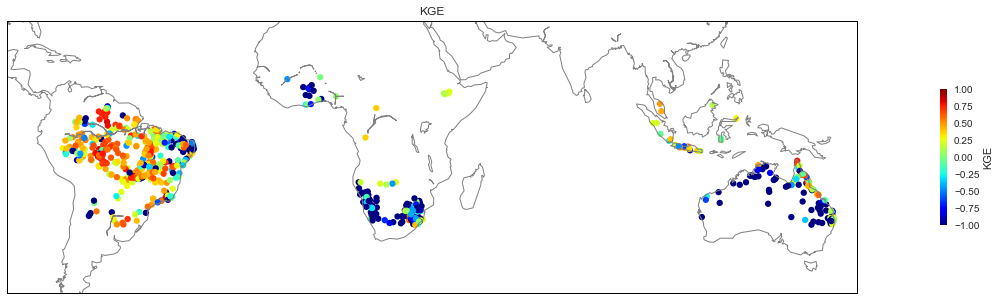

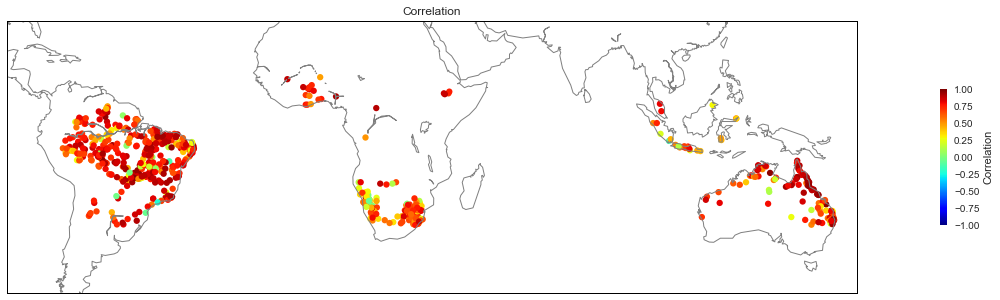

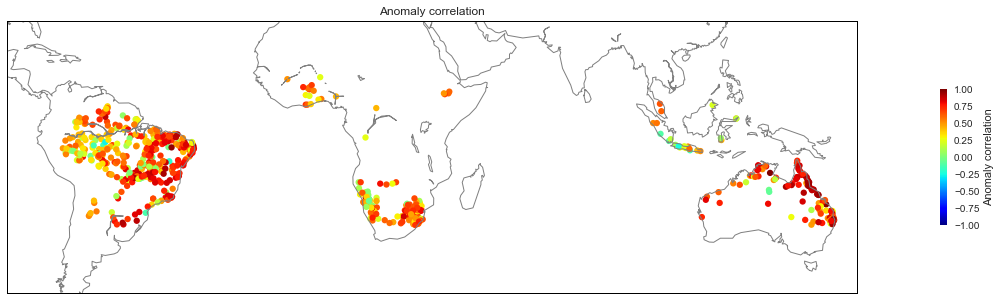

In [6]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

# plot KGE
# Plot locations on map
fig = plt.figure(figsize=(30,5))
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
# Make colorbar same size as figures
# divider = make_axes_locatable(sc)
# cax = divider.append_axes("right", size="5%", pad=0)
# cb=plt.colorbar(cax=cax,label='KGE')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot Correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Correlation")
plt.title('Correlation')
plt.show()

# plot anomaly correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['anomaly_correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Anomaly correlation")
plt.title('Anomaly correlation')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()



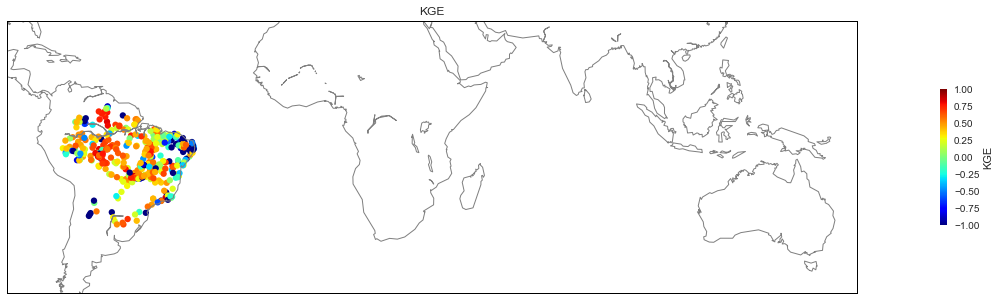

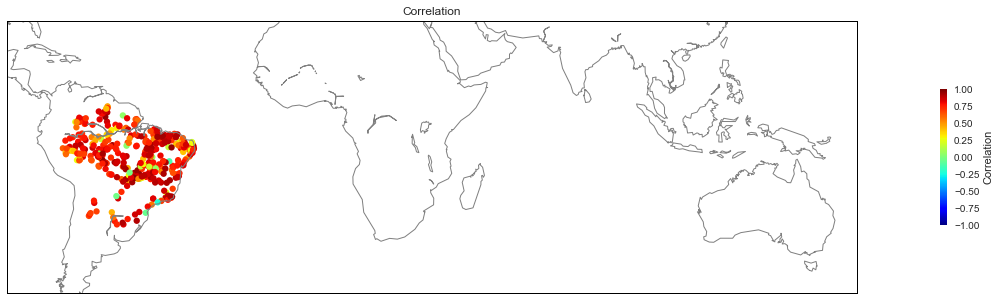

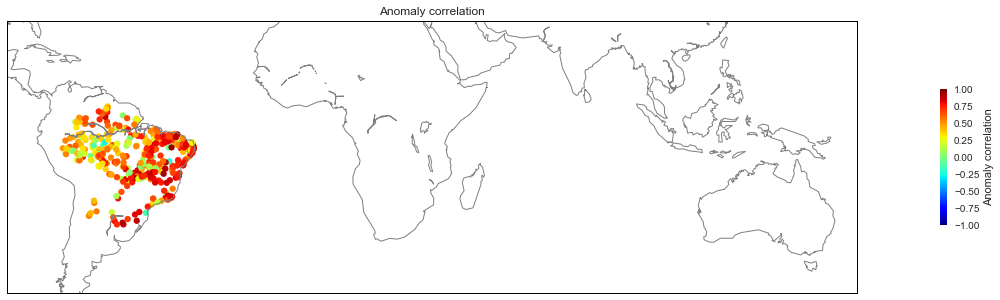

0.333461541289
0.780115435084
0.599093855727
(365,) (365,) (365,)
(258,) (339,) (306,)
70.68493150684931 92.87671232876713 83.83561643835617
(194,) (312,) (219,)
53.15068493150685 85.47945205479452 60.0
(163,) (290,) (182,)
44.657534246575345 79.45205479452055 49.86301369863014
(117,) (253,) (121,)
32.054794520547944 69.31506849315069 33.15068493150685
(73,) (156,) (60,)
20.0 42.73972602739726 16.438356164383563


In [13]:
# Same figure as above, only for SA

mask=data['model_longitude_in_arc_degree']<-35
data_SA = data[mask]
#print(sorted(data_SA['model_longitude_in_arc_degree'].values))

# plot KGE
# Plot locations on map
fig = plt.figure(figsize=(30,5))
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
# Make colorbar same size as figures
# divider = make_axes_locatable(sc)
# cax = divider.append_axes("right", size="5%", pad=0)
# cb=plt.colorbar(cax=cax,label='KGE')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot Correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Correlation")
plt.title('Correlation')
plt.show()

# plot anomaly correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['anomaly_correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Anomaly correlation")
plt.title('Anomaly correlation')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

KGE_val=sorted(data_SA["kge_2012"].values)
cor_val=sorted(data_SA["correlation"].values)
ano_val=sorted(data_SA["anomaly_correlation"].values)

print(np.nanmedian(KGE_val))
print(np.nanmedian(cor_val))
print(np.nanmedian(ano_val))

totalnumberofstations=3.65 #3.65 for amazon, 6.87 for whole world

print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_val=sorted(i for i in KGE_val if i >= 0)
cor_val=sorted(i for i in cor_val if i >= 0.3)
ano_val=sorted(i for i in ano_val if i >= 0.3)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.3)
cor_val=sorted(i for i in cor_val if i >= 0.5)
ano_val=sorted(i for i in ano_val if i >= 0.5)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.4)
cor_val=sorted(i for i in cor_val if i >= 0.6)
ano_val=sorted(i for i in ano_val if i >= 0.6)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.5)
cor_val=sorted(i for i in cor_val if i >= 0.7)
ano_val=sorted(i for i in ano_val if i >= 0.7)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.6)
cor_val=sorted(i for i in cor_val if i >= 0.8)
ano_val=sorted(i for i in ano_val if i >= 0.8)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
#WHOLE WORLD

In [ ]:
KGE_val=sorted(data["kge_2012"].values)
cor_val=sorted(data["correlation"].values)
ano_val=sorted(data["anomaly_correlation"].values)

print(np.nanmedian(KGE_val))
print(np.nanmedian(cor_val))
print(np.nanmedian(ano_val))

totalnumberofstations=6.87 #3.65 for amazon, 6.87 for whole world

print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_val=sorted(i for i in KGE_val if i >= 0)
cor_val=sorted(i for i in cor_val if i >= 0.3)
ano_val=sorted(i for i in ano_val if i >= 0.3)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.3)
cor_val=sorted(i for i in cor_val if i >= 0.5)
ano_val=sorted(i for i in ano_val if i >= 0.5)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.4)
cor_val=sorted(i for i in cor_val if i >= 0.6)
ano_val=sorted(i for i in ano_val if i >= 0.6)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.5)
cor_val=sorted(i for i in cor_val if i >= 0.7)
ano_val=sorted(i for i in ano_val if i >= 0.7)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.6)
cor_val=sorted(i for i in cor_val if i >= 0.8)
ano_val=sorted(i for i in ano_val if i >= 0.8)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
#WHOLE WORLD

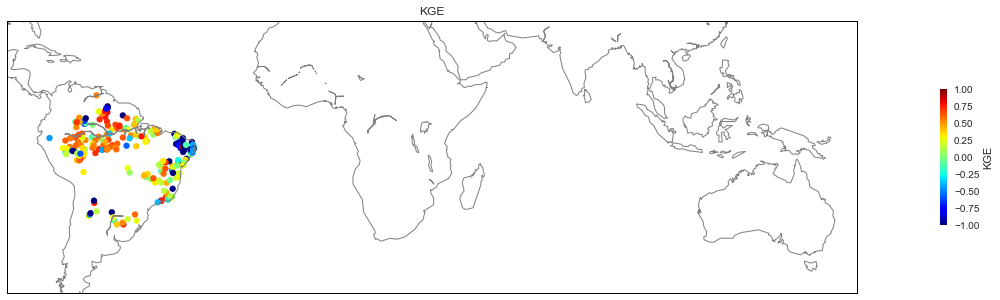

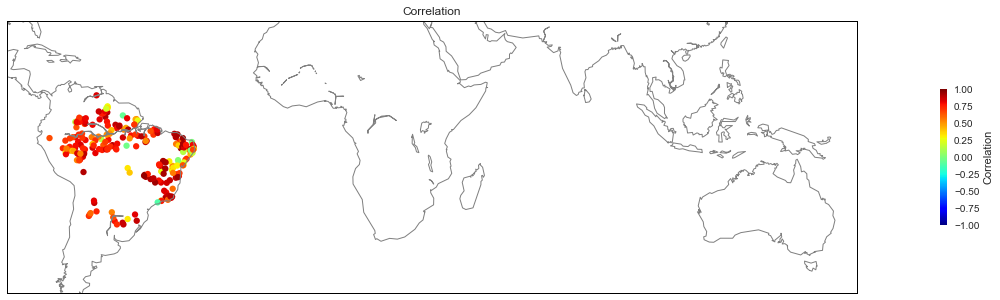

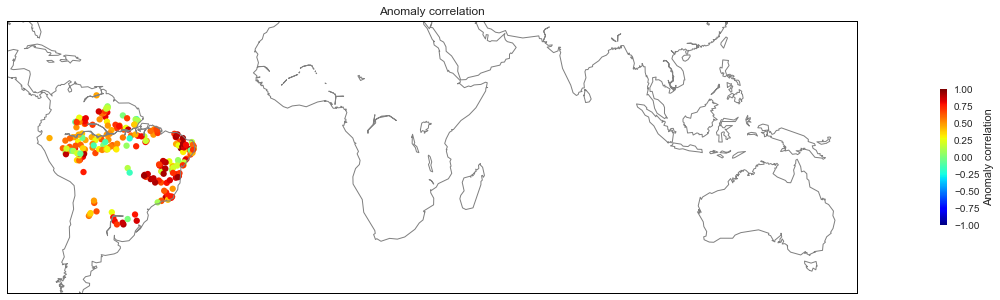

0.271865001928
0.762553970221
0.589831755366
(221,) (221,) (221,)
(154,) (200,) (172,)
69.68325791855203 90.49773755656109 77.82805429864254
(101,) (180,) (135,)
45.70135746606335 81.44796380090497 61.085972850678736
(38,) (84,) (39,)
17.194570135746606 38.009049773755656 17.647058823529413


In [28]:
# TRMM analysis

import numpy as np
import os,sys
import pandas as pd
import netCDF4 as nc
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import fileinput
%matplotlib inline

data = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/summary_TRMM_hybam_andGRDC.txt',sep=";",index_col='id_from_grdc')

#print(sorted(data['num_of_month_pairs'].values))
data=data[data['num_of_month_pairs']>12]
#print(sorted(data['num_of_month_pairs'].values))

# Monthly Anomaly correlation
obs_ano=[]
sim_ano=[]
obs_rel_ano=[]
sim_rel_ano=[]
path='/Users/killaars/PhD/Elnino/Discharge/grdc/TRMM/'
for file in os.listdir(path):
    if file.endswith('.txt'):
        #print(file)
        data_ano = pd.read_csv(os.path.join(path,file),sep=";",skiprows=3)
        f=open(os.path.join(path,file))
        text=f.readlines(0)
        for t in text:
            if t.endswith('.mon\n'):
                station=t.split("/")[-1]
                grdc_id=station[0:7]
        data_ano=data_ano.dropna()
        data_ano['date'] = pd.to_datetime(data_ano['date'])
        data_ano=data_ano.set_index('date')
        month_mean=data_ano.groupby([data_ano.index.month]).mean()
        #print(month_mean)
        for index in data_ano.index.values:
            #print(index)
            month=pd.to_datetime(index).month
            data_ano.loc[index,'observation_anomaly']=data_ano.loc[index,'observation']-month_mean.loc[int(month),'observation']
            data_ano.loc[index,'simulated_anomaly']=data_ano.loc[index,'simulation']-month_mean.loc[int(month),'simulation']
            data_ano['obs_relative_anomaly']=data_ano['observation_anomaly']/data_ano['observation'].mean()
            data_ano['sim_relative_anomaly']=data_ano['simulated_anomaly']/data_ano['simulation'].mean()
        #print(data_ano)
        obs_ano=np.append(obs_ano,data_ano['observation_anomaly'].values)        
        sim_ano=np.append(sim_ano,data_ano['simulated_anomaly'].values)
        obs_rel_ano=np.append(obs_rel_ano,data_ano['obs_relative_anomaly'].values)        
        sim_rel_ano=np.append(sim_rel_ano,data_ano['sim_relative_anomaly'].values)
        #print(obs_ano)
        #print(sim_ano)
        anomaly_correlation=data_ano.corr()
        #print(anomaly_correlation.iloc[2,3])
        data.loc[int(grdc_id),'anomaly_correlation']=anomaly_correlation.iloc[2,3]
        
# Same figure as above, only for SA

mask=data['model_longitude_in_arc_degree']<-35
data_SA = data[mask]
#print(sorted(data_SA['model_longitude_in_arc_degree'].values))

# plot KGE
# Plot locations on map
fig = plt.figure(figsize=(30,5))
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
# Make colorbar same size as figures
# divider = make_axes_locatable(sc)
# cax = divider.append_axes("right", size="5%", pad=0)
# cb=plt.colorbar(cax=cax,label='KGE')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot Correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Correlation")
plt.title('Correlation')
plt.show()

# plot anomaly correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['anomaly_correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Anomaly correlation")
plt.title('Anomaly correlation')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

KGE_val=sorted(data_SA["kge_2012"].values)
cor_val=sorted(data_SA["correlation"].values)
ano_val=sorted(data_SA["anomaly_correlation"].values)

print(np.nanmedian(KGE_val))
print(np.nanmedian(cor_val))
print(np.nanmedian(ano_val))

totalnumberofstations=2.21 #3.65 for amazon, 6.87 for whole world

print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_val=sorted(i for i in KGE_val if i >= 0)
cor_val=sorted(i for i in cor_val if i >= 0.3)
ano_val=sorted(i for i in ano_val if i >= 0.3)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.3)
cor_val=sorted(i for i in cor_val if i >= 0.5)
ano_val=sorted(i for i in ano_val if i >= 0.5)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
# KGE_val=sorted(i for i in KGE_val if i >= 0.4)
# cor_val=sorted(i for i in cor_val if i >= 0.6)
# ano_val=sorted(i for i in ano_val if i >= 0.6)
# print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
# KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
# print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
# KGE_val=sorted(i for i in KGE_val if i >= 0.5)
# cor_val=sorted(i for i in cor_val if i >= 0.7)
# ano_val=sorted(i for i in ano_val if i >= 0.7)
# print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
# KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
# print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.6)
cor_val=sorted(i for i in cor_val if i >= 0.8)
ano_val=sorted(i for i in ano_val if i >= 0.8)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
#WHOLE WORLD

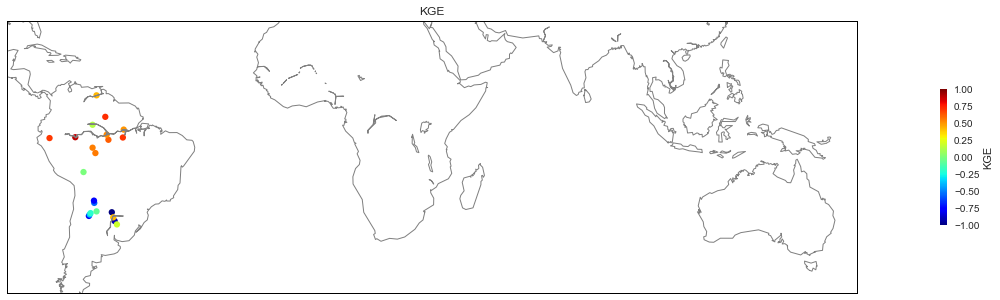

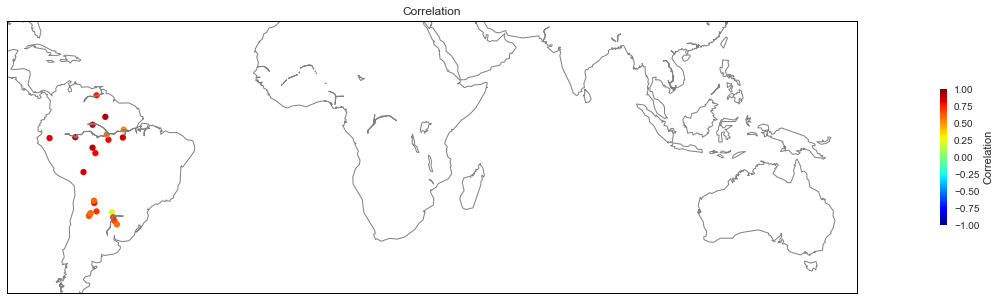

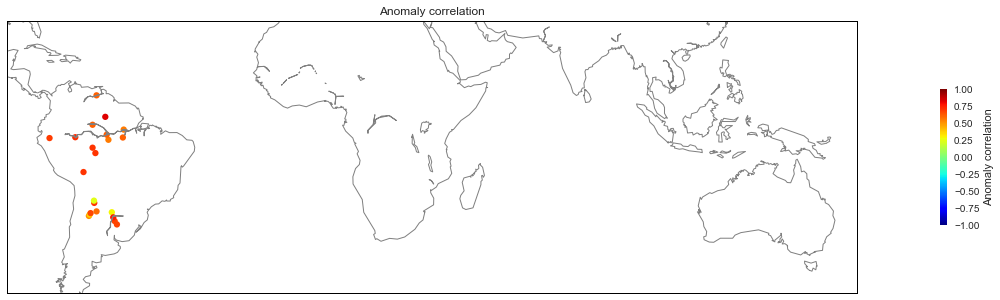

0.307563860229
0.745666049206
0.645409499683
(22,) (22,) (22,)
(13,) (21,) (20,)
59.09090909090909 95.45454545454545 90.9090909090909
(11,) (21,) (19,)
50.0 95.45454545454545 86.36363636363636
(5,) (8,) (1,)
22.727272727272727 36.36363636363637 4.545454545454546


In [26]:
# ERA5 analysis

import numpy as np
import os,sys
import pandas as pd
import netCDF4 as nc
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import fileinput
%matplotlib inline

data = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/summary_ERA5_hybam_andGRDC.txt',sep=";",index_col='id_from_grdc')

#print(sorted(data['num_of_month_pairs'].values))
data=data[data['num_of_month_pairs']>12]
#print(sorted(data['num_of_month_pairs'].values))

# Monthly Anomaly correlation
obs_ano=[]
sim_ano=[]
obs_rel_ano=[]
sim_rel_ano=[]
path='/Users/killaars/PhD/Elnino/Discharge/grdc/ERA5/'
for file in os.listdir(path):
    if file.endswith('.txt'):
        #print(file)
        data_ano = pd.read_csv(os.path.join(path,file),sep=";",skiprows=3)
        f=open(os.path.join(path,file))
        text=f.readlines(0)
        for t in text:
            if t.endswith('.mon\n'):
                station=t.split("/")[-1]
                grdc_id=station[0:7]
        data_ano=data_ano.dropna()
        data_ano['date'] = pd.to_datetime(data_ano['date'])
        data_ano=data_ano.set_index('date')
        month_mean=data_ano.groupby([data_ano.index.month]).mean()
        #print(month_mean)
        for index in data_ano.index.values:
            #print(index)
            month=pd.to_datetime(index).month
            data_ano.loc[index,'observation_anomaly']=data_ano.loc[index,'observation']-month_mean.loc[int(month),'observation']
            data_ano.loc[index,'simulated_anomaly']=data_ano.loc[index,'simulation']-month_mean.loc[int(month),'simulation']
            data_ano['obs_relative_anomaly']=data_ano['observation_anomaly']/data_ano['observation'].mean()
            data_ano['sim_relative_anomaly']=data_ano['simulated_anomaly']/data_ano['simulation'].mean()
        #print(data_ano)
        obs_ano=np.append(obs_ano,data_ano['observation_anomaly'].values)        
        sim_ano=np.append(sim_ano,data_ano['simulated_anomaly'].values)
        obs_rel_ano=np.append(obs_rel_ano,data_ano['obs_relative_anomaly'].values)        
        sim_rel_ano=np.append(sim_rel_ano,data_ano['sim_relative_anomaly'].values)
        #print(obs_ano)
        #print(sim_ano)
        anomaly_correlation=data_ano.corr()
        #print(anomaly_correlation.iloc[2,3])
        data.loc[int(grdc_id),'anomaly_correlation']=anomaly_correlation.iloc[2,3]
        
# Same figure as above, only for SA

mask=data['model_longitude_in_arc_degree']<-35
data_SA = data[mask]
#print(sorted(data_SA['model_longitude_in_arc_degree'].values))

# plot KGE
# Plot locations on map
fig = plt.figure(figsize=(30,5))
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
# Make colorbar same size as figures
# divider = make_axes_locatable(sc)
# cax = divider.append_axes("right", size="5%", pad=0)
# cb=plt.colorbar(cax=cax,label='KGE')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot Correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Correlation")
plt.title('Correlation')
plt.show()

# plot anomaly correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['anomaly_correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Anomaly correlation")
plt.title('Anomaly correlation')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

KGE_val=sorted(data_SA["kge_2012"].values)
cor_val=sorted(data_SA["correlation"].values)
ano_val=sorted(data_SA["anomaly_correlation"].values)

print(np.nanmedian(KGE_val))
print(np.nanmedian(cor_val))
print(np.nanmedian(ano_val))

totalnumberofstations=0.22 #3.65 for amazon, 6.87 for whole world

print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_val=sorted(i for i in KGE_val if i >= 0)
cor_val=sorted(i for i in cor_val if i >= 0.3)
ano_val=sorted(i for i in ano_val if i >= 0.3)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.3)
cor_val=sorted(i for i in cor_val if i >= 0.5)
ano_val=sorted(i for i in ano_val if i >= 0.5)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
# KGE_val=sorted(i for i in KGE_val if i >= 0.4)
# cor_val=sorted(i for i in cor_val if i >= 0.6)
# ano_val=sorted(i for i in ano_val if i >= 0.6)
# print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
# KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
# print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
# KGE_val=sorted(i for i in KGE_val if i >= 0.5)
# cor_val=sorted(i for i in cor_val if i >= 0.7)
# ano_val=sorted(i for i in ano_val if i >= 0.7)
# print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
# KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
# print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.6)
cor_val=sorted(i for i in cor_val if i >= 0.8)
ano_val=sorted(i for i in ano_val if i >= 0.8)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
#WHOLE WORLD

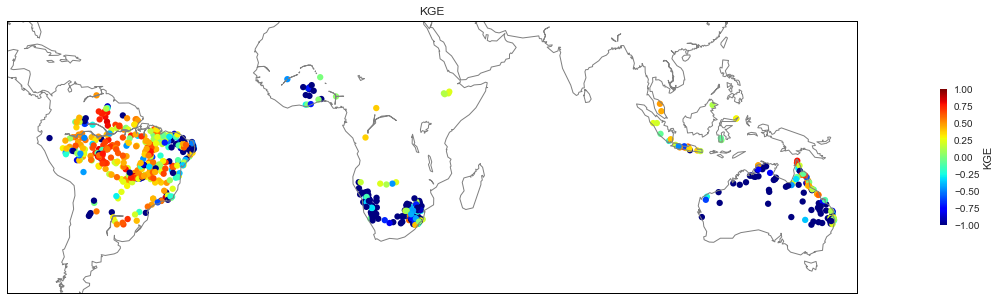

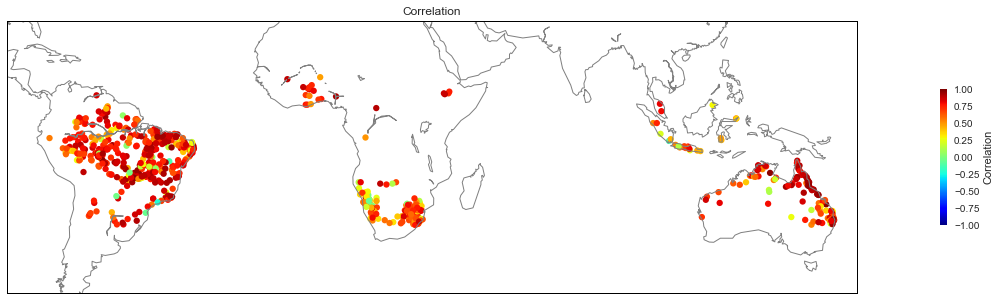

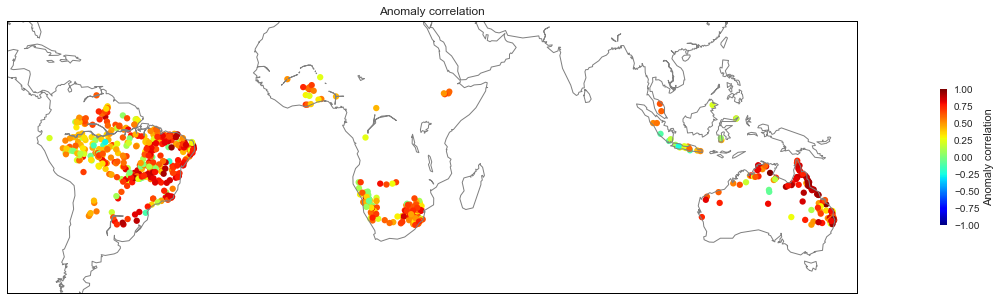

-0.0033059870126
0.749717338561
0.606218055207
(692,) (692,) (692,)
(342,) (628,) (576,)
49.421965317919074 90.7514450867052 83.23699421965318
(235,) (564,) (438,)
33.959537572254334 81.5028901734104 63.29479768786127
(86,) (260,) (128,)
12.427745664739884 37.57225433526012 18.497109826589597


In [34]:
# MSWEP analysis

import numpy as np
import os,sys
import pandas as pd
import netCDF4 as nc
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import fileinput
%matplotlib inline

data = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/summary_MSWEP_all_hybam.txt',sep=";",index_col='id_from_grdc')

#print(sorted(data['num_of_month_pairs'].values))
data=data[data['num_of_month_pairs']>12]
#print(sorted(data['num_of_month_pairs'].values))

# Monthly Anomaly correlation
obs_ano=[]
sim_ano=[]
obs_rel_ano=[]
sim_rel_ano=[]
path='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA_and_other/'
for file in os.listdir(path):
    if file.endswith('.txt'):
        #print(file)
        data_ano = pd.read_csv(os.path.join(path,file),sep=";",skiprows=3)
        f=open(os.path.join(path,file))
        text=f.readlines(0)
        for t in text:
            if t.endswith('.mon\n'):
                station=t.split("/")[-1]
                grdc_id=station[0:7]
        data_ano=data_ano.dropna()
        data_ano['date'] = pd.to_datetime(data_ano['date'])
        data_ano=data_ano.set_index('date')
        month_mean=data_ano.groupby([data_ano.index.month]).mean()
        #print(month_mean)
        for index in data_ano.index.values:
            #print(index)
            month=pd.to_datetime(index).month
            data_ano.loc[index,'observation_anomaly']=data_ano.loc[index,'observation']-month_mean.loc[int(month),'observation']
            data_ano.loc[index,'simulated_anomaly']=data_ano.loc[index,'simulation']-month_mean.loc[int(month),'simulation']
            data_ano['obs_relative_anomaly']=data_ano['observation_anomaly']/data_ano['observation'].mean()
            data_ano['sim_relative_anomaly']=data_ano['simulated_anomaly']/data_ano['simulation'].mean()
        #print(data_ano)
        obs_ano=np.append(obs_ano,data_ano['observation_anomaly'].values)        
        sim_ano=np.append(sim_ano,data_ano['simulated_anomaly'].values)
        obs_rel_ano=np.append(obs_rel_ano,data_ano['obs_relative_anomaly'].values)        
        sim_rel_ano=np.append(sim_rel_ano,data_ano['sim_relative_anomaly'].values)
        #print(obs_ano)
        #print(sim_ano)
        anomaly_correlation=data_ano.corr()
        #print(anomaly_correlation.iloc[2,3])
        data.loc[int(grdc_id),'anomaly_correlation']=anomaly_correlation.iloc[2,3]
        
# Same figure as above, only for SA

# mask=data['model_longitude_in_arc_degree']<-35
# data_SA = data[mask]
data_SA = data
#print(sorted(data_SA['model_longitude_in_arc_degree'].values))

# plot KGE
# Plot locations on map
fig = plt.figure(figsize=(30,5))
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
# Make colorbar same size as figures
# divider = make_axes_locatable(sc)
# cax = divider.append_axes("right", size="5%", pad=0)
# cb=plt.colorbar(cax=cax,label='KGE')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')

plt.savefig("/Users/killaars/PhD/Elnino/Figures_paper/KGE.pdf", bbox_inches='tight', dpi=300)
plt.show()

# plot Correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Correlation")
plt.title('Correlation')

plt.savefig("/Users/killaars/PhD/Elnino/Figures_paper/Correlation.pdf", bbox_inches='tight', dpi=300)
plt.show()

# plot anomaly correlation
fig = plt.figure(figsize=(30,5))
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=30,\
            llcrnrlon=-90,urcrnrlon=160,resolution='c')
m.drawcoastlines(color='.5')
m.drawmapboundary(fill_color='white')

x,y = m(data_SA["model_longitude_in_arc_degree"].values, data_SA["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data_SA into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data_SA['anomaly_correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Anomaly correlation")
plt.title('Anomaly correlation')

plt.savefig("/Users/killaars/PhD/Elnino/Figures_paper/Anomaly_correlation.pdf", bbox_inches='tight', dpi=300)
plt.show()

KGE_val=sorted(data_SA["kge_2012"].values)
cor_val=sorted(data_SA["correlation"].values)
ano_val=sorted(data_SA["anomaly_correlation"].values)

# print(KGE_val)
# print(cor_val)
# print(ano_val)

# KGE_val = KGE_val[~np.isnan(KGE_val)]
# cor_val = cor_val[~np.isnan(cor_val)]
# ano_val = ano_val[~np.isnan(ano_val)]

print(np.nanmedian(KGE_val))
print(np.nanmedian(cor_val))
print(np.nanmedian(ano_val))

totalnumberofstations=6.92 #3.70 for amazon, 6.92 for whole world

print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_val=sorted(i for i in KGE_val if i >= 0)
cor_val=sorted(i for i in cor_val if i >= 0.3)
ano_val=sorted(i for i in ano_val if i >= 0.3)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.3)
cor_val=sorted(i for i in cor_val if i >= 0.5)
ano_val=sorted(i for i in ano_val if i >= 0.5)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
# KGE_val=sorted(i for i in KGE_val if i >= 0.4)
# cor_val=sorted(i for i in cor_val if i >= 0.6)
# ano_val=sorted(i for i in ano_val if i >= 0.6)
# print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
# KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
# print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
# KGE_val=sorted(i for i in KGE_val if i >= 0.5)
# cor_val=sorted(i for i in cor_val if i >= 0.7)
# ano_val=sorted(i for i in ano_val if i >= 0.7)
# print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
# KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
# print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
KGE_val=sorted(i for i in KGE_val if i >= 0.6)
cor_val=sorted(i for i in cor_val if i >= 0.8)
ano_val=sorted(i for i in ano_val if i >= 0.8)
print(np.shape(KGE_val),np.shape(cor_val),np.shape(ano_val))
KGE_perc,cor_perc,ano_perc=np.shape(KGE_val)[0],np.shape(cor_val)[0],np.shape(ano_val)[0]
print(KGE_perc/totalnumberofstations,cor_perc/totalnumberofstations,ano_perc/totalnumberofstations)
#WHOLE WORLD